<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/NINScan_Data_Reading_inital_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#All Function

In [36]:
import struct
import ipywidgets as widgets
from IPython.display import display
from glob import glob
import os
import numpy as np
import pandas as pd
from __future__ import absolute_import
#import nintools_v34 as nt
#fname = sys.argv[1]

import sys
import numpy as np
from pylab import *
from six.moves import range
import matplotlib.pyplot as plt



hbohb_extinctions = np.array([
#Lambda  O2Hb    HHb
[250,   106112, 112736],
[252,   105552, 112736],
[254,   107660, 112736],
[256,   109788, 113824],
[258,   112944, 115040],
[260,   116376, 116296],
[262,   120188, 117564],
[264,   124412, 118876],
[266,   128696, 120208],
[268,   133064, 121544],
[270,   136068, 122880],
[272,   137232, 123096],
[274,   138408, 121952],
[276,   137424, 120808],
[278,   135820, 119840],
[280,   131936, 118872],
[282,   127720, 117628],
[284,   122280, 114820],
[286,   116508, 112008],
[288,   108484, 107140],
[290,   104752, 98364],
[292,   98936,  91636],
[294,   88136,  85820],
[296,   79316,  77100],
[298,   70884,  69444],
[300,   65972,  64440],
[302,   63208,  61300],
[304,   61952,  58828],
[306,   62352,  56908],
[308,   62856,  57620],
[310,   63352,  59156],
[312,   65972,  62248],
[314,   69016,  65344],
[316,   72404,  68312],
[318,   75536,  71208],
[320,   78752,  74508],
[322,   82256,  78284],
[324,   85972,  82060],
[326,   89796,  85592],
[328,   93768,  88516],
[330,   97512,  90856],
[332,   100964, 93192],
[334,   103504, 95532],
[336,   104968, 99792],
[338,   106452, 104476],
[340,   107884, 108472],
[342,   109060, 110996],
[344,   110092, 113524],
[346,   109032, 116052],
[348,   107984, 118752],
[350,   106576, 122092],
[352,   105040, 125436],
[354,   103696, 128776],
[356,   101568, 132120],
[358,   97828,  133632],
[360,   94744,  134940],
[362,   92248,  136044],
[364,   89836,  136972],
[366,   88484,  137900],
[368,   87512,  138856],
[370,   88176,  139968],
[372,   91592,  141084],
[374,   95140,  142196],
[376,   98936,  143312],
[378,   103432, 144424],
[380,   109564, 145232],
[382,   116968, 145232],
[384,   125420, 148668],
[386,   135132, 153908],
[388,   148100, 159544],
[390,   167748, 167780],
[392,   189740, 180004],
[394,   212060, 191540],
[396,   231612, 202124],
[398,   248404, 212712],
[400,   266232, 223296],
[402,   284224, 236188],
[404,   308716, 253368],
[406,   354208, 270548],
[408,   422320, 287356],
[410,   466840, 303956],
[412,   500200, 321344],
[414,   524280, 342596],
[416,   521880, 363848],
[418,   515520, 385680],
[420,   480360, 407560],
[422,   431880, 429880],
[424,   376236, 461200],
[426,   326032, 481840],
[428,   283112, 500840],
[430,   246072, 528600],
[432,   214120, 552160],
[434,   165332, 552160],
[436,   132820, 547040],
[438,   119140, 501560],
[440,   102580, 413280],
[442,   92780,  363240],
[444,   81444,  282724],
[446,   76324,  237224],
[448,   67044,  173320],
[450,   62816,  103292],
[452,   58864,  62640],
[454,   53552,  36170],
[456,   49496,  30698.8],
[458,   47496,  25886.4],
[460,   44480,  23388.8],
[462,   41320,  20891.2],
[464,   39807.2,    19260.8],
[466,   37073.2,    18142.4],
[468,   34870.8,    17025.6],
[470,   33209.2,    16156.4],
[472,   31620,  15310],
[474,   30113.6,    15048.4],
[476,   28850.8,    14792.8],
[478,   27718,  14657.2],
[480,   26629.2,    14550],
[482,   25701.6,    14881.2],
[484,   25180.4,    15212.4],
[486,   24669.6,    15543.6],
[488,   24174.8,    15898],
[490,   23684.4,    16684],
[492,   23086.8,    17469.6],
[494,   22457.6,    18255.6],
[496,   21850.4,    19041.2],
[498,   21260,  19891.2],
[500,   20932.8,    20862],
[502,   20596.4,    21832.8],
[504,   20418,  22803.6],
[506,   19946,  23774.4],
[508,   19996,  24745.2],
[510,   20035.2,    25773.6],
[512,   20150.4,    26936.8],
[514,   20429.2,    28100],
[516,   21001.6,    29263.2],
[518,   22509.6,    30426.4],
[520,   24202.4,    31589.6],
[522,   26450.4,    32851.2],
[524,   29269.2,    34397.6],
[526,   32496.4,    35944],
[528,   35990,  37490],
[530,   39956.8,    39036.4],
[532,   43876,  40584],
[534,   46924,  42088],
[536,   49752,  43592],
[538,   51712,  45092],
[540,   53236,  46592],
[542,   53292,  48148],
[544,   52096,  49708],
[546,   49868,  51268],
[548,   46660,  52496],
[550,   43016,  53412],
[552,   39675.2,    54080],
[554,   36815.2,    54520],
[556,   34476.8,    54540],
[558,   33456,  54164],
[560,   32613.2,    53788],
[562,   32620,  52276],
[564,   33915.6,    50572],
[566,   36495.2,    48828],
[568,   40172,  46948],
[570,   44496,  45072],
[572,   49172,  43340],
[574,   53308,  41716],
[576,   55540,  40092],
[578,   54728,  38467.6],
[580,   50104,  37020],
[582,   43304,  35676.4],
[584,   34639.6,    34332.8],
[586,   26600.4,    32851.6],
[588,   19763.2,    31075.2],
[590,   14400.8,    28324.4],
[592,   10468.4,    25470],
[594,   7678.8, 22574.8],
[596,   5683.6, 19800],
[598,   4504.4, 17058.4],
[600,   3200,   14677.2],
[602,   2664,   13622.4],
[604,   2128,   12567.6],
[606,   1789.2, 11513.2],
[608,   1647.6, 10477.6],
[610,   1506,   9443.6],
[612,   1364.4, 8591.2],
[614,   1222.8, 7762],
[616,   1110,   7344.8],
[618,   1026,   6927.2],
[620,   942,    6509.6],
[622,   858,    6193.2],
[624,   774,    5906.8],
[626,   707.6,  5620],
[628,   658.8,  5366.8],
[630,   610,    5148.8],
[632,   561.2,  4930.8],
[634,   512.4,  4730.8],
[636,   478.8,  4602.4],
[638,   460.4,  4473.6],
[640,   442,    4345.2],
[642,   423.6,  4216.8],
[644,   405.2,  4088.4],
[646,   390.4,  3965.08],
[648,   379.2,  3857.6],
[650,   368,    3750.12],
[652,   356.8,  3642.64],
[654,   345.6,  3535.16],
[656,   335.2,  3427.68],
[658,   325.6,  3320.2],
[660,   319.6,  3226.56],
[662,   314,    3140.28],
[664,   308.4,  3053.96],
[666,   302.8,  2967.68],
[668,   298,    2881.4],
[670,   294,    2795.12],
[672,   290,    2708.84],
[674,   285.6,  2627.64],
[676,   282,    2554.4],
[678,   279.2,  2481.16],
[680,   277.6,  2407.92],
[682,   276,    2334.68],
[684,   274.4,  2261.48],
[686,   272.8,  2188.24],
[688,   274.4,  2115],
[690,   276,    2051.96],
[692,   277.6,  2000.48],
[694,   279.2,  1949.04],
[696,   282,    1897.56],
[698,   286,    1846.08],
[700,   290,    1794.28],
[702,   294,    1741],
[704,   298,    1687.76],
[706,   302.8,  1634.48],
[708,   308.4,  1583.52],
[710,   314,    1540.48],
[712,   319.6,  1497.4],
[714,   325.2,  1454.36],
[716,   332,    1411.32],
[718,   340,    1368.28],
[720,   348,    1325.88],
[722,   356,    1285.16],
[724,   364,    1244.44],
[726,   372.4,  1203.68],
[728,   381.2,  1152.8],
[730,   390,    1102.2],
[732,   398.8,  1102.2],
[734,   407.6,  1102.2],
[736,   418.8,  1101.76],
[738,   432.4,  1100.48],
[740,   446,    1115.88],
[742,   459.6,  1161.64],
[744,   473.2,  1207.4],
[746,   487.6,  1266.04],
[748,   502.8,  1333.24],
[750,   518,    1405.24],
[752,   533.2,  1515.32],
[754,   548.4,  1541.76],
[756,   562,    1560.48],
[758,   574,    1560.48],
[760,   586,    1548.52],
[762,   598,    1508.44],
[764,   610,    1459.56],
[766,   622.8,  1410.52],
[768,   636.4,  1361.32],
[770,   650,    1311.88],
[772,   663.6,  1262.44],
[774,   677.2,  1213],
[776,   689.2,  1163.56],
[778,   699.6,  1114.8],
[780,   710,    1075.44],
[782,   720.4,  1036.08],
[784,   730.8,  996.72],
[786,   740,    957.36],
[788,   748,    921.8],
[790,   756,    890.8],
[792,   764,    859.8],
[794,   772,    828.8],
[796,   786.4,  802.96],
[798,   807.2,  782.36],
[800,   816,    761.72],
[802,   828,    743.84],
[804,   836,    737.08],
[806,   844,    730.28],
[808,   856,    723.52],
[810,   864,    717.08],
[812,   872,    711.84],
[814,   880,    706.6],
[816,   887.2,  701.32],
[818,   901.6,  696.08],
[820,   916,    693.76],
[822,   930.4,  693.6],
[824,   944.8,  693.48],
[826,   956.4,  693.32],
[828,   965.2,  693.2],
[830,   974,    693.04],
[832,   982.8,  692.92],
[834,   991.6,  692.76],
[836,   1001.2, 692.64],
[838,   1011.6, 692.48],
[840,   1022,   692.36],
[842,   1032.4, 692.2],
[844,   1042.8, 691.96],
[846,   1050,   691.76],
[848,   1054,   691.52],
[850,   1058,   691.32],
[852,   1062,   691.08],
[854,   1066,   690.88],
[856,   1072.8, 690.64],
[858,   1082.4, 692.44],
[860,   1092,   694.32],
[862,   1101.6, 696.2],
[864,   1111.2, 698.04],
[866,   1118.4, 699.92],
[868,   1123.2, 701.8],
[870,   1128,   705.84],
[872,   1132.8, 709.96],
[874,   1137.6, 714.08],
[876,   1142.8, 718.2],
[878,   1148.4, 722.32],
[880,   1154,   726.44],
[882,   1159.6, 729.84],
[884,   1165.2, 733.2],
[886,   1170,   736.6],
[888,   1174,   739.96],
[890,   1178,   743.6],
[892,   1182,   747.24],
[894,   1186,   750.88],
[896,   1190,   754.52],
[898,   1194,   758.16],
[900,   1198,   761.84],
[902,   1202,   765.04],
[904,   1206,   767.44],
[906,   1209.2, 769.8],
[908,   1211.6, 772.16],
[910,   1214,   774.56],
[912,   1216.4, 776.92],
[914,   1218.8, 778.4],
[916,   1220.8, 778.04],
[918,   1222.4, 777.72],
[920,   1224,   777.36],
[922,   1225.6, 777.04],
[924,   1227.2, 776.64],
[926,   1226.8, 772.36],
[928,   1224.4, 768.08],
[930,   1222,   763.84],
[932,   1219.6, 752.28],
[934,   1217.2, 737.56],
[936,   1215.6, 722.88],
[938,   1214.8, 708.16],
[940,   1214,   693.44],
[942,   1213.2, 678.72],
[944,   1212.4, 660.52],
[946,   1210.4, 641.08],
[948,   1207.2, 621.64],
[950,   1204,   602.24],
[952,   1200.8, 583.4],
[954,   1197.6, 568.92],
[956,   1194,   554.48],
[958,   1190,   540.04],
[960,   1186,   525.56],
[962,   1182,   511.12],
[964,   1178,   495.36],
[966,   1173.2, 473.32],
[968,   1167.6, 451.32],
[970,   1162,   429.32],
[972,   1156.4, 415.28],
[974,   1150.8, 402.28],
[976,   1144,   389.288],
[978,   1136,   374.944],
[980,   1128,   359.656],
[982,   1120,   344.372],
[984,   1112,   329.084],
[986,   1102.4, 313.796],
[988,   1091.2, 298.508],
[990,   1080,   283.22],
[992,   1068.8, 267.932],
[994,   1057.6, 252.648],
[996,   1046.4, 237.36],
[998,   1035.2, 222.072],
[1000,  1024,   206.784]])





DEFAULTwavelengths = [830,780]
DEFAULTfilt_param= {
                      'NIRS':[5,0],
                      'SRC':[5,0],
                      'BKGD':[5,0],
                      'ACCE':[100,0],
                      'EstG':[0,0],
                      'FORC':[1,0],
                      'GYRO':[100,0],
                      'RESP':[5,0],
                      'TEMP':[0.1,0],
                      'NECG':[0,0],
                     }

NUMSRC = 8
CHUNKSIZE = 1000
FASTRATE = 250
SLOWRATE = 25
ProbeGains = [30., 1500.]
BoardGains = [1., 2., 4., 5., 8., 10., 16., 20., 25., 32.,
              40., 50., 64., 80., 100., 128., 160., 256., 320., 512., 1024.]

FAST_RAW_SIGNALS = ['GYRO','ACCE','EstG','NECG','AUXC']
SLOW_RAW_SIGNALS = ['SRC','BKGD','FORC','TEMP']

AUX_SIGNALS = FAST_RAW_SIGNALS + SLOW_RAW_SIGNALS
srcs = [0]*8+[1]*8+[2]*8+[3]*8+[4]*8+[5]*8+[6]*8+[7]*8
dets = list(range(8))*8
FULLml = list(zip(srcs,dets))




def prune_data(d,ml,bothwavelengths=False):
    """

Prune data in 'd' to only those measurements in ml. If
'bothwavelengths' is True, keep both wavelengths together.

RETURNS: pruned version of 'd'
"""
    newd = []
    for src,det in ml:
        newd.append(d[:,src*8+det])
        if bothwavelengths:
            if src in [0,2,4,6]:
                newd.append(d[:,(src+1)*8+det])
    return np.array(newd).T



def prune_hbdata(hbd,ml):
    """

Prune hbhbo data in 'hbd' to only those measurements in ml.

RETURNS: pruned version of 'hbd'
"""
    newd0 = []
    newd1 = []
    for src,det in ml:
        # skip odd ones because we have separate hb & hbo lists
        if src in [1,3,5,7]:
            continue
        newsrc = int(src/2)  # INTEGER division!
        newd0.append(hbd[0,:,newsrc*8+det])
        newd1.append(hbd[1,:,newsrc*8+det])
    newd0 = np.array([newd0,newd1])
    print(newd0.shape)
    print(len(newd1))
    return np.transpose(newd0,[0,2,1])






def getExtinctions(lambdas,molecule='hb'):
    """Gets the extinction coefficients from data table in this optical.py file.

    Usage:   getExtinctions(lambdas,molecule='hb')  moledule='h2o' or 'aa3' or 'lipid'
    Returns: returns lists of extinction coefficients for each wavelength (Hb, HbO)
    """

    # extinction matrix holds the lambda,Hb,HbO
    A = hbohb_extinctions*1   # data embedded at the end of this file

    nLambda = len(lambdas)

    if molecule == 'hb':
        Hb = np.zeros(nLambda)
        HbO = np.zeros(nLambda)

        for i in range(nLambda):
            # If we have an odd wavelength interpulate the epsilon
            if np.mod(lambdas[i],2)==1:
                idx      = np.argmax(A[:,0]==lambdas[i]-1)  # -1 because table values are even
                Hb[i]    = (A[idx,2]+A[idx+1,2]) / 2.
                HbO[i]   = (A[idx,1]+A[idx+1,1]) / 2.
#                print idx, Hb[i], HbO[i]
            else:
                idx      = np.argmax(A[:,0]==lambdas[i])
                Hb[i]    = A[idx,2]
                HbO[i]   = A[idx,1]
#                print idx, Hb[i], HbO[i]

        # For humans the fudge factor is 1.15e-4
        # If you do this then you get percent of 4% whole blood not molar concentration
        #Hb=Hb*1.15e-4
        #HbO=HHbo*1.15e-4

        # molar weight too small; fix extinction coeff
#        Hb = Hb * 4
#        HbO = HbO * 4

        return Hb, HbO

    elif molecule == 'h2o':
        h2o = np.zeros(nLambda)

        for i in range(nLambda):
            # find closest wavelength
            idx = 0
            while h2o_abscoef[idx,0] < lambdas[i]:
                idx += 1
            h2o[i] = h2o_abscoef[idx,1]
        return h2o

    elif molecule == 'aa3':
        aa3 = np.zeros(nLambda)

        for i in range(nLambda):
            # If we have an odd wavelength interpulate the epsilon
            if np.mod(lambdas[i],2)==1:
                idx    = np.argmax(aa3_abscoef[:,0]==lambdas[i])-1  # -1 because table values are even
                aa3[i] = (aa3_abscoef[idx,1]+aa3_abscoef[idx+1,1]) / 2.
            else:
                idx    = np.argmax(aa3_abscoef[:,0]==lambdas[i])
                aa3[i] = aa3_abscoef[idx,1]
        return aa3

        # round to closest
        for i in range(nLambda):
            idx = np.floor((lambdas[i]-650)/2)
            aa3[i] = aa3_abscoef[idx,1]
        return aa3

    elif molecule == 'lipid':
        lipid = np.zeros(nLambda)

        for i in range(nLambda):
            # If we have an odd wavelength interpulate the epsilon
            if np.mod(lambdas[i],2)==1:
                idx      = np.argmax(lipid_abscoef[:,0]==lambdas[i])-1  # -1 because table values are even
                lipid[i]    = (lipid_abscoef[idx,1]+lipid_abscoef[idx+1,1]) / 2.
            else:
                idx      = np.argmax(lipid_abscoef[:,0]==lambdas[i])
                lipid[i] = lipid_abscoef[idx,1]
        return lipid






def od2hbhbo_bls(data, wavelengths, BLs):
    """%
  Converts ONE channel's worth of optical data (in OD units) to hb/hbo data,
  given appropriate wavelength-dependent scaling factors (BLs)
  Assumes: the absorbtion is proportional to the fluence

  [hbhbo,A]=od2hbhbo_BLs(
    data,         # OD data for these 2+ wavelengths (e.g., [data(:,(830col)), data(:,785col)])
    wavelengths,  # 2+ wavelengths used (e.g., [830 785])
    BLs)          # k's to be used for this source-detector pair ==> fluence/BL
                  # (e.g., [18 18]

   hb,hbo,A = Hb and HbO timeseries' in units of [Moles/Liter], A-matrix
"""
    nLambda = len(wavelengths)
    [hb,hbo] = getExtinctions(wavelengths,'hb')
#    print hb
#    print hbo
    A = np.array([hb,hbo])
    wavelengths = np.array(wavelengths)
    BLs = np.array(BLs)

    # in case it was passed in incorrectly
    m,n = data.shape
    if m<n:
        data = data.T
        m,n = data.shape

    # Make sure we have enough wavelengths
    if nLambda<2 or nLambda<data.shape[1]:
        n = max(2,data.shape[1])
        print("Need %s wavelengths to do [hb,hbo] transform on %s columns." %(nLambda,n))
        return

    data = (1./BLs)*data

    # Least squares does not buy you anything if you only have a two by
    # two so don't do the processing on it.
    if len(np.unique(wavelengths))==2:
        hbhbo = np.dot(data,np.linalg.inv(A))
    else:  # This means we have an overdetermined case, so do the least squares
        print(A)
        hbhbo = np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)  # compute (A.T*A)^-1 * A.T
        hbhbo = np.dot(hbhbo.T,data.T)
#        hbhbo = hbhbo.T

    hb=hbhbo[:,0]
    hbo=hbhbo[:,1]
    return hbhbo/np.log(10)



def nin_od2hbhbo(od, wavelengths=DEFAULTwavelengths, BLs=[6,6]):
    """
  Convert NIN optical-density data to deoxy/oxy-hemoglobin concentrations.

  RETURNS: hbhbos, hbhboml ... hbhbos=TIMEx[HHb,O2Hb], hbhboml=measurement list for hbhbos
  """
    hbhbos = []
    hbhboml = []
    for src in [0,2,4,6]:
        for det in range(8):
            # next line steps by 8 to get src*8+det and (src+1)*8+det only
            hbhbos.append(od2hbhbo_bls(od[:,src*8+det:(src+2)*8+det:8],wavelengths, BLs))
            hbhboml.append([src,det])
    hbhbos = np.array(hbhbos)
    hbhbos = np.transpose(hbhbos,[2,1,0])
    hbhboml = np.array(hbhboml)
    return hbhbos, hbhboml






def nin_makeOD(data,baseline=None):
    """
    Compute optical density using baseline period ...where data = (TIME x CHAN)
    and baseline = None (use entire dataset); DEFAULT
                = integer (number-of-points to use from start-of-recording)
                = 1D list of indices into data to use
                = 2D array of data used to calc mean for each channel

    RETURNS: ODdata
    """
    if baseline == None:
        baseline = np.mean(data,0)
    elif type(baseline)==IntType:
        baseline = np.mean(data[:baseline],0)
    elif type(baseline)==type(list):  # must be indices
        baseline = np.mean(data[baseline],0)
    elif len(baseline.shape) == 2:  # must be data
        baseline = np.mean(baseline,0)
    else:
        print("Not appropriate size/shape for baseline in makeOD")
        return

    # now calculate OD
    normalized_fluence = (1./baseline)*data
    ODdata = -np.log(normalized_fluence)

    return ODdata








def nin_SNR(d,window=None):
    """
    Calculate SNR over a time-window (in sec) from data in d (TIME x CHANNELS).
    If no window (in sec from recording-start), calculate SNR over whole recording.

    RETURNS: 8x8 array of SNRs
    """
    ### CALCULATE SNR
    if window is None:
        windowstart = 0
        windowend = len(d)
    else:
        windowstart = int(window[0]*SLOWRATE)
        windowend = int(window[1]*SLOWRATE)
    SNR = np.mean(d[windowstart:windowend,:],0)/np.std(d[windowstart:windowend,:],0)
    SNRmap = np.reshape(np.array(SNR),(8,8))
    return SNRmap







def nin_ML(d,boardgain,GAINthresh=16,SNRwindow=[0,60],SNRthresh=2,pSrc=None,pDet=None,geometry=None,DISTthresh=75,verbose=False):
    """
    Determine a "good measurement" list based on <GAINthresh, >SNRthresh, <DISTthresh
    RETURNS: list of [src,det] pairs that are "good" measurements
    """

    if geometry is not None:
        pSrc,pDet = get_geometry(geometry)
    else:
        pSrc = None
        pDet = None
    SNR = nin_SNR(d,SNRwindow)
    ml1 = []
    ml2 = []
    for item in FULLml:
        src,det = item
        if src not in [0,2,4,6]:  # doing pairs, so start with evens only
            continue
        if not boardgain[src,det]<GAINthresh:       # check 830nm gain
#            print "bad 830 board gain:",boardgain[src,det]
            continue
        if not boardgain[src+1,det]<GAINthresh:     # see if 780nm gain is ALSO good
#            print "bad 780 board gain:",boardgain[src,det]
            continue
        if not SNR[src,det]>SNRthresh:              # check SNR threshold 830
#            print "bad 830 SNR:",SNR[src,det]
            continue
        if not SNR[src+1,det]>SNRthresh:            # check SNR threshold 780
#            print "bad 780 SNR:",SNR[src,det]
            continue
        if pSrc is not None and pDet is not None:
            if dist(pSrc[src/2],pDet[det])<DISTthresh:    # check distance is <threshold
                ml1.append([src,det])
                ml2.append([src+1,det])
                if verbose:
                    print("S",src," D",det,": gain=",boardgain[src,det])
                    print("Matlab good-SD listing:")
                    print("   ",src+1,det+1)
                    print("   ",src+2,det+1)
        else:
            # no distance info available; save it as-is
            ml1.append([src,det])
            ml2.append([src+1,det])
    return np.array(ml1+ml2)





def nin_filt_all(a,filt_param=DEFAULTfilt_param,verbose=True):
    """
    Apply a lowpass and highpass filter to a TIME x CHANNELS data.
    filt_param holds a dictionary like this {'ACCE':[LPF_cutoff, HPF_cutoff]}.
    Uses nt.lowpass/nt.hipass. Works on all channels in 'a' dict.

    RETURNS: copy of 'a' with all filt_param applied
    """
    tmp = {}
    for k in a.keys():
        if k in ['NIRS','SRC','BKGD']:
            RATE = 25
        elif k in ['ACCE','GYRO','EstG','NECG']:
            RATE = 250
        elif k in ['RESP','TEMP','FORC']:
            RATE = 25
        try:
            if verbose:
                print(" ",k,": LPF=",filt_param[k][0], "  HPF=",filt_param[k][1])
            tmp[k] = lowpass(a[k],filt_param[k][0],RATE)
            tmp[k] = hipass(tmp[k],filt_param[k][1],RATE)
        except:
            print("      Failed filtering in nin_filt_aux() for",k)
            tmp[k] = a[k]
            pass
    return tmp




def fix_accel(a):
    """
    Swaps byte-order for a['ACCE']. IN-PLACE operation (no return value)

    RETURNS: nothing (fixes a['ACCE'] in-place)
    """
    a['ACCE'] = a['ACCE'].newbyteorder()
    # no need to return, as it fixes in-place (given there's no copy here)





def nin_convert_aux(a,EstGgains=[],acc=200,force='forc'):
    """

    Apply unit-conversions to raw auxiliary data.

    USAGE:   a = auxiliary data dict (from get_nin_aux)
            gains comes from config['EstGgain']
            acc={16,200} for the +/-16g or +/-200g accel
            force={'forc','resp'} for which one is attached
    RETURNS: ac (new dictionary with converted-units data)
    """
    ac = {}
    if acc==0:
        # DON'T CONVERT ANYTHING!!
        ac = a
    else:
        for k in a.keys():
            if k=='ACCE':
    #            ac[k] = np.where(a[k]<4095,a[k]*0.0039,0)
    #            ac[k] = np.where(a[k]>4095,(a[k]-8192)*0.0039,ac[k])
                if acc==16:
                    ac[k] = a[k].astype(np.float) *49/ 25. /256. /1.9  # 49 mg/bit; @@@1.9=fudge
                elif acc==200:
                    #@@@gotta reverse this one
                    fix_accel(a) #tmp = a[k].newbyteorder()
                    ac[k] = a[k].astype(np.float) *3.9/1000. /256.  # 3.9 mg/bit
            elif k=="FORC":
                ac[k] = a[k].astype(np.float) *0.00061   # mV; 0.61 mV/bit
                ac[k] = ac[k] *2.0/0.055   # empirically (2015-0914-115727.txt), 2kg-->0.055mV signal
            elif k=='GYRO':
                ac[k] = a[k].astype(np.float) *70 /1000.   # 70 mdeg/digit --> conv. to degrees
            elif k=="RESP":
                ac[k] = a[k].astype(np.float) #@@@ no conversion for now
            elif k=="TEMP":
                ac[k] = a[k].astype(np.float) /256.      # deg C; 0.25 deg C/bit
            elif k=="EstG":
                ac[k] = a[k]*1.0
                if len(EstGgains):
                    for i in range(8):
                        ac[k][:,i] = ac[k][:,i] *0.53644/EstGgains[i]  # uV
            else:  # @@@i.e., RESP or NECG or anything else
                ac[k] = a[k].astype(np.float) #@@@ no conversion for now
    return ac




def nin_unwrap_gains(a,config):
    """
    Unwrap gain settings from NIRS 'diff' (raw-bkgd) data.

    RETURNS: d (TIME x 64 CHANNELS, with signals adjusted for gains)
    """
    keys = ['NIRS']
    if config['keepraw']==True:
        keys = keys + ['SRC','BKGD']

    for k in keys:
        d = a[k].astype('float')
        for src in range(8):
            for det in range(8):
                d[:,src*8+det] = d[:,src*8+det] / (ProbeGains[config['PROBEgain'][src,det]] *
                                                   BoardGains[config['BOARDgain'][src,det]])
    config['gainunwrapped'] = 1
    return a, config




def nin_convert_aux(a,EstGgains=[],acc=200,force='forc'):
    """

Apply unit-conversions to raw auxiliary data.

USAGE:   a = auxiliary data dict (from get_nin_aux)
         gains comes from config['EstGgain']
         acc={16,200} for the +/-16g or +/-200g accel
         force={'forc','resp'} for which one is attached
RETURNS: ac (new dictionary with converted-units data)
"""
    ac = {}
    if acc==0:
        # DON'T CONVERT ANYTHING!!
        ac = a
    else:
        for k in a.keys():
            if k=='ACCE':
    #            ac[k] = np.where(a[k]<4095,a[k]*0.0039,0)
    #            ac[k] = np.where(a[k]>4095,(a[k]-8192)*0.0039,ac[k])
                if acc==16:
                    ac[k] = a[k].astype(np.float) *49/ 25. /256. /1.9  # 49 mg/bit; @@@1.9=fudge
                elif acc==200:
                    #@@@gotta reverse this one
                    fix_accel(a) #tmp = a[k].newbyteorder()
                    ac[k] = a[k].astype(np.float) *3.9/1000. /256.  # 3.9 mg/bit
            elif k=="FORC":
                ac[k] = a[k].astype(np.float) *0.00061   # mV; 0.61 mV/bit
                ac[k] = ac[k] *2.0/0.055   # empirically (2015-0914-115727.txt), 2kg-->0.055mV signal
            elif k=='GYRO':
                ac[k] = a[k].astype(np.float) *70 /1000.   # 70 mdeg/digit --> conv. to degrees
            elif k=="RESP":
                ac[k] = a[k].astype(np.float) #@@@ no conversion for now
            elif k=="TEMP":
                ac[k] = a[k].astype(np.float) /256.      # deg C; 0.25 deg C/bit
            elif k=="EstG":
                ac[k] = a[k]*1.0
                if len(EstGgains):
                    for i in range(8):
                        ac[k][:,i] = ac[k][:,i] *0.53644/EstGgains[i]  # uV
            else:  # @@@i.e., RESP or NECG or anything else
                ac[k] = a[k].astype(np.float) #@@@ no conversion for now
    return ac


def nin_convert(a,config,unwrapgain=False,acceltype=200,force='forc',notchfilt=[],filt_param=DEFAULTfilt_param,verbose=True):
    """

    Function to unwrap gain, convert aux to SI units, and/or filter, as requested.

    USAGE:   a = data dict
            config = configuration info, updated by this function
            unwrapgain = correct for gain settings or not?
            acc = {16,200} for the +/-16g or +/-200g accel; ignores any other values
            force = {'forc','resp'} for which one is attached
            notch = ['NIRS','EstG'] ... dict keys where 60&120Hz notch filters should be applied
            filt_param = dictionary entries like {'NIRS':[lpf,hpf]}
    RETURNS: updated a, updated config
    """
    ac = {}

    ### UNWRAP GAINS IF REQUESTED /and/ NEEDED
    if unwrapgain:
        if config['gainunwrapped']==False:
            ac,config = nin_unwrap_gains(a,config)
    else:  # otherwise, just copy over the source data
        ac['NIRS'] = a['NIRS']
        if config['keepraw']==True:
            ac['SRC'] = a['SRC']
            ac['BKGD'] = a['BKGD']

    ### CONVERT AUX CHANNELS TO SI-ish UNITS, IF REQUESTED
    auxc = nin_convert_aux(a,acc=acceltype,force=force)
    ac.update(auxc)

    ### NOTCH-FILTER IF REQUESTED
    if len(notchfilt):
        for k in notchfilt:
            if verbose:
                print("NOTCH-FILTERING ...",k)
            ac[k] = notch(ac[k])

    ### FILTER IF REQUESTED
    if filt_param:
        if verbose:
            print("FILTERING DATA ...")
        ac = nin_filt_all(ac,filt_param,verbose)

    ### UPDATE FLAGS & FILT IN 'config'
    config['gainunwrapped'] = unwrapgain
    config['filt_param'] = filt_param
    config['acceltype'] = acceltype
    config['notch'] = notchfilt

    return ac, config









def trim_data(a,td=None,ta=None,segstart=0,verbose=False):
    """

    Trim off tail ends of some data so everything aligns, in 2 clumps:
        25Hz signals = raw, bkgd, diff, a['TEMP'], a['FORC'], a['RESP']
        250Hz signals = a['EstG'], a['ACCE'], a['GYRO']

    RETURNS: a, td, ta ... with TIME dimensions truncated to same-length
    """
    # DEAL WITH FAST-RATE DATA
#    print 'a:', a.keys()
    all_len = []
    if verbose: print("  BEFORE ...")
#    print a.keys()
    for key in FAST_RAW_SIGNALS:
        if key not in a:
            continue
        if verbose: print("    ",key,len(a[key]))
        ln = len(a[key])
        if ln>10:
            all_len.append(len(a[key]))
        else:
            if verbose: print("    REMOVING ...",key)
            a.pop(key,None)
    minlen = min(all_len)
    if verbose: print("  AFTER ...")
    for key in FAST_RAW_SIGNALS:
        if key not in a:
            continue
        a[key] = a[key][:minlen]
        if verbose: print("    ",key,len(a[key]))
    if ta is None:
        ta = np.arange(minlen)/float(FASTRATE)+segstart
    else:
        ta = ta[:minlen]

    # SECOND DEAL WITH SLOW-RATE DATA
    if verbose: print("  BEFORE ...")
    for key in SLOW_RAW_SIGNALS:
#        print key,a.has_key(key)
        if key not in a:
            continue
        if verbose: print("    ",key,len(a[key]))
        if ln>10:
            all_len.append(len(a[key]))
        else:
            if verbose: print("    REMOVING ...",key)
            a.pop(key,None)
    minlen = min(all_len)
    if verbose: print("  AFTER ...")
    for key in SLOW_RAW_SIGNALS:
        if a is not None:
            if key not in a:
                continue
            a[key] = a[key][:minlen]
            if verbose: print("    ",key,len(a[key]))

    if 'SRC' in a and 'BKGD' in a:
        a['NIRS'] = a['SRC']-a['BKGD']

    if td is None:
        td = np.arange(minlen)/float(SLOWRATE)+segstart
    else:
        td = td[:minlen]

    return a, td, ta









def get_nin_aux(fname,segstart=0,segend=-1,verbose=True):
    """

    Read in a time-segment of auxiliary data from a .NIN file.
    segstart/segend are in seconds (-1=whole file)

    RETURNS: dictionary with ACCE, TEMP, FORC, EstG, GYRO and/or RESP components, td, ta
    """
    if segend==-1:
        segend = 1000000  # 1 million seconds (plenty to cover whole file)

    if fname[-4:] in ['.edf','.bdf','.mat']:
        fname = fname[:-4]+'.nin'

    a = {}
    for s in AUX_SIGNALS:
        if s in ['BKGD','SRC','NIRS']:
            continue
        if verbose:
            print("    Getting ",s)
        if s in FAST_RAW_SIGNALS:
            a,ta = get_nin_data(fname,s,segstart,segend,a)
        else:
            a,td = get_nin_data(fname,s,segstart,segend,a)
    return a, ta, td



def nin_nirsarray(n,b):
    """

    Convert raw-read NIRS data (SRC or BKG) from dictionaries to two 8x8 arrays.

    RETURNS: raw, bkgd (numpy arrays, TIME x 64 CHANNELS)
    """
    ### CONVERT NIRS FROM DICTIONARIES TO TWO 8X8 ARRAYS
    lngn = []
    lngb = []
    for k in list(b.keys()): # find the length of the shortest (probably src7, but could be another)
        lngn.append(n[k].shape[0])
        lngb.append(b[k].shape[0])
    lng = min(lngn+lngb)
    raw = np.concatenate((n['src0'][:lng],n['src1'][:lng]),1)
    bkgd = np.concatenate((b['src0'][:lng],b['src1'][:lng]),1)
    for i in range(2,8):
        raw = np.concatenate((raw,n['src'+str(i)][:lng]),1)
        bkgd = np.concatenate((bkgd,b['src'+str(i)][:lng]),1)
    return raw, bkgd




def get_nin_data(fname, varstring, segstart=0, segend=-1, data={}):
    """

    Read in a time-segment of data from NIN-M compatible (.nin) file. Use varstring=
            'SRC' to get laser-on data,
            'BKG' to get laser-off data,
            'ACCE' for accelerometery data
            'FORC' for force sensor
            'TEMP' for temperature sensor
            'EstG' for analog (8 channels of E*G) sensors
            'NECG' for analog new-style (separate-ground) ECG
    segstart/segend are in seconds (-1=whole file)

    RETURNS: dictionary (can supply as input to append dictionary), timebase
    """
    # HANDLE EITHER .MAT OR .NIN FILES
    if fname[-4:] in ['.edf','.bdf','.mat']:
        fname = fname[:-4]+'.nin'

    # OPEN FILE AND INITIALIZE DATA DICTIONARIES AS NEEDED
    f = open(fname,'rb')
    if 'SRC' in varstring or 'BKG' in varstring:
        data = {}  # absolutely critical initialization, despite d={} in fcn
        for src in range(NUMSRC):
            data['src'+str(src)] = []
    elif 'EstG' in varstring and len(varstring)==5:
        data['EstG'] = []
    else:
        data[varstring] = []

    # SET PROPER END-TIME DEFAULT, IF NEEDED
    if segend==-1:
        segend = 1000000  # 1 million seconds (plenty to cover whole file)

    # START THE MAIN FILE-READING LOOP
    s = b''         # holds raw BYTES data from file
    pointer = 0     # tracks the "current time in file", in points (not sec)
    targetlen = 0   # make sure this is pre-defined to avoid potential crash
    while True:
        # GET CHUNK OF BYTES FROM THE FILE
        raw = f.read(CHUNKSIZE)

        # END OF THE FILE YET?
        if not raw:
            break  # exit loop

        # ADD CHUNK TO s FOR PROCESSING
        s = s+raw

        # IF PROCESSED 10000 BYTES AND STILL NO varstring, PARAMETER IS MISSING-->BAIL
        if s.find(bytes(varstring,'utf-8'))==-1 and len(s)>10000:
            # must not have this parameter in this datafile
            break

        # LOOP OVER BYTES IN s
        while s:
            # TRY TO FIND varstring IN s
            if 'EstG' in varstring and len(varstring)==5:
                idx = s.find(bytes(varstring[:-1],'utf-8'))
                if idx==-1:
                    break # no 'varstring' in this one, get a new chunk
            else:
                idx = s.find(bytes(varstring,'utf-8'))
                if idx==-1:
                    break # no 'varstring' in this one, get a new chunk

            # START EXTRACTING DATA, DEPENDING ON varstring REQUESTED
            if varstring in ['SRC0','SRC1','SRC2','SRC3','SRC4','SRC5','SRC6','SRC7',
                             'BKG0','BKG1','BKG2','BKG3','BKG4','BKG5','BKG6','BKG7']:
                if idx+4+8*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<HHHHHHHH',s[idx+4:idx+4+8*2])
                if (pointer/25.)>=segstart and (pointer/25.)<segend:
                    sn = varstring[-1]
                    data['src'+sn].append(newdata)
                    pointer += 1
                s = s[idx+4+8*2:]

            elif varstring in ['SRC','BKG']:  # will be one or the other for the whole loop
                if idx+4+8*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<HHHHHHHH',s[idx+4:idx+4+8*2])
                srcnum = chr(s[idx+3])
                if (pointer/25.)>=segstart and (pointer/25.)<segend:
                    try:
                        data['src'+str(srcnum)].append(newdata)
                    except:
                        pass
                if srcnum=='7': # is it SRC7?? (last one in a timeslice-->THEN increment)
                    pointer += 1
                s = s[idx+4+8*2:]

            elif varstring=='ACCE':
                if idx+4+3*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<hhh',s[idx+4:idx+4+3*2])
                #@@@ NOTE: need >hhh for other accel, but fix_accel() can byteswap
                if pointer/250.>=segstart and pointer/250.<segend:
                    data[varstring].append(newdata)
                pointer += 1
                s = s[idx+4+3*2:]

            elif varstring=='GYRO':
                if idx+4+3*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<hhh',s[idx+4:idx+4+3*2])
                if pointer/250.>=segstart and pointer/250.<segend:
                    data[varstring].append(newdata)
                pointer += 1
                s = s[idx+4+3*2:]

            elif varstring=='TEMP':
                if idx+4+1*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<H',s[idx+4:idx+4+1*2])
                if pointer/25.>=segstart and pointer/25.<segend:
                    data[varstring].append(newdata)
                pointer += 1
                s = s[idx+4+1*2:]

            elif varstring=='FORC':
                if idx+4+1*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<H',s[idx+4:idx+4+1*2])
                if pointer/25.>=segstart and pointer/25.<segend:
                    data[varstring].append(newdata)
                pointer += 1
                s = s[idx+4+1*2:]

            elif varstring=='RESP':
                if idx+4+1*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<H',s[idx+4:idx+4+1*2])
                if pointer/25.>=segstart and pointer/25.<segend:
                    data[varstring].append(newdata)
                pointer += 1
                s = s[idx+4+1*2:]

            elif varstring=='NECG':
                if idx+4+1*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<H',s[idx+4:idx+4+1*2])
                if pointer/25.>=segstart and pointer/25.<segend:
                    data[varstring].append(newdata)
                pointer += 1
                s = s[idx+4+1*2:]

            elif varstring=='AUXC':
                if idx+4+8*2>len(s):
                    break # not enough data to parse this one, get a new chunk
                newdata = struct.unpack('<hhhhhhhh',s[idx+4:idx+4+8*2])
                if pointer/250.>=segstart and pointer/250.<segend:
                    data[varstring].append(newdata)
                pointer += 1
                s = s[idx+4+8*2:]

            elif varstring=='EstG':
                if idx+4+8*4>len(s):
                    break # not enough data to parse this one, get a new chunk
                tmp = []
                # grab groups of 3 bytes (after 'EstG') and add on 00 or 80 byte at end (sign)
                for i in range(8):
                    tmp += struct.unpack('<i', s[idx+4+(i*3):idx+4+(i*3+3)] +(b'\x00' if s[idx+4+(i*3+2)]<128 else b'\xff'))
                if pointer/250.>=segstart and pointer/250.<segend:
                    data[varstring].append(tmp) #newdata)
                pointer += 1
                s = s[idx+4+8*4:]

            elif varstring in ['EstG0','EstG1','EstG2','EstG3','EstG4','EstG5','EstG6','EstG7']:
                if idx+4+8*4>len(s):
                    break # not enough data to parse this one, get a new chunk
                # grab groups of 3 bytes (after 'EstG') and add on 00 or 80 byte at end (sign)
                i = int(varstring[-1])  # figure out which channel they want
                tmp = struct.unpack('<i', s[idx+4+(i*3):idx+4+(i*3+3)] +(b'\x00' if s[idx+4+(i*3+2)]<128 else b'\xff'))
                if pointer/250.>=segstart and pointer/250.<segend:
                    data[varstring[:-1]].append(tmp)
                pointer += 1
                s = s[idx+4+8*4:]

            # DETERMINE IF NEED TO READ IN MORE OR NOT
            if varstring in ['SRC','BKG'] or 'SRC' in varstring or 'BKG' in varstring:
                targetlen = pointer/25./8.
            elif varstring in ['FORC','TEMP','RESP']:
                targetlen = pointer/25.
            elif varstring in ['EstG','ACCE','GYRO','NECG'] or 'EstG' in varstring:
                targetlen = pointer/250.
            if targetlen>=segend:
                break

        # CRASH OUT IF NO NEED TO READ THE FILE FURTHER
        if targetlen>=segend:
            break

#    print "On exit:",data.keys()
    # CONVERT ALL DATA TO ARRAYS BEFORE RETURNING
    for key in list(data.keys()):
        data[key] = np.array(data[key])
#    print "On return:",data.keys()

    # BUILD AN APPROPRIATE TIME-BASE
    td = None
    ta = None
    if varstring in ['FORC','RESP','TEMP']:
        td = np.arange(len(data[varstring]))/25.+segstart
    elif varstring in ['SRC','BKG']:
        td = np.arange(len(data['src0']))/25.+segstart
    elif varstring in ['SRC0','SRC1','SRC2','SRC3','SRC4','SRC5','SRC6','SRC7',
                       'BKG0','BKG1','BKG2','BKG3','BKG4','BKG5','BKG6','BKG7']:
        td = np.arange(len(data['src'+varstring[-1]]))/25.+segstart
    elif varstring in ['ACCE','GYRO','EstG','NECG']:
        ta = np.arange(len(data[varstring]))/250.+segstart
    elif 'EstG' in varstring:
        ta = np.arange(len(data[varstring[:-1]]))/250.+segstart

    if td is not None:
        return data, td
    elif ta is not None:
        return data, ta
    else:
        return data, None








def get_nin_config(fname):
    """

    Return info from NIN-M -Config.txt file as a dictionary.

    RETURNS: dictionary of config-file info
"""
    if fname[-4:] in ['.edf','.bdf','.mat']:
        fname = fname[:-4]+'.nin'
    if 'Config' not in fname:
        if '.nin' in fname:
            fname = fname[:-4]+'-Config.txt'
        else:
            fname = fname+'-Config.txt'

    PROBEgain = []
    BOARDgain = []
    f = open(fname,'r')
    x = f.readline()
    while x != "":
        if "Probe Gain" in x:
            for i in range(8):
                x = f.readline()
                PROBEgain += [list(map(int,x.strip()))]
        elif "Board Gain" in x:
            for i in range(8):
                x = f.readline()
                BOARDgain += [list(map(int,x.split()))]
        elif "Source Power" in x:
            x = f.readline()
            SRCpower = list(map(int,x.split()))
        elif "E*G Setting" in x:
            x = f.readline()
            EstGgain = list(map(int,str.split(x)))
        elif "Accel Setting" in x:
            x = f.readline()
            ACC = int(str.strip(x))
        elif "Force Gain" in x:
            x = f.readline()
            FORCE = int(str.strip(x))
        elif "TTL Trigger Out" in x:
            x = f.readline()
            try:
                TTLout = int(str.strip(x))
            except:
                TTLout = 0
        elif "TTL Trigger In" in x:
            x = f.readline()
            try:
                TTLin = int(str.strip(x))
            except:
                TTLin = 0
        elif "Digital In" in x:
            x = f.readline()
            try:
                Digital = int(str.strip(x))
            except:
                Digital = 0
        elif "Bluetooth" in x:
            x = f.readline()
            try:
                BT = int(str.strip(x))
            except:
                BT = 1
        x = f.readline()

    dct = {'PROBEgain':np.array(PROBEgain),
            'BOARDgain':np.array(BOARDgain),
            'SRCpower':SRCpower,
            'EstGgain':EstGgain,
            'ACCgain':ACC,
            'FORCEgain':FORCE,
            'TTLout':TTLout,
            'TTLin':TTLin,
            'DIGITALin':Digital,
            'BT':BT}
    return dct




def get_nin_events(fname):
    """

    Read in all events from a NIN-M/SE -Event.txt file.

    RETURNS: 4 lists (ea,eb,ec,ed) of [timestamp, 250Hz_data_index] pairs
    """
    if fname[-4:] in ['.edf','.bdf','.mat']:
        fname = fname[:-4]+'.nin'


    idx = fname.find('.nin')
    prefix = fname[:idx]
    f = open(prefix+'.nin','rb')
    starttime = f.read(16)[1:-1]  # datetime is first 16 characters as [2015-0821-1553]
    f.close()
    #try:
    f = open(os.path.dirname(fname)+"/Event-"+prefix.split("-")[-1]+'.txt','r')
    #except:
        #return [],[],[],[]

    ea = []
    eb = []
    ec = []
    ed = []
    l = f.readlines()
    if l:
        for row in l[1:]:
            try:
                x = row.split()
                dt = datetime.datetime(int(x[0][:4]),int(x[0][5:7]),int(x[0][7:9]),int(x[0][10:12]),int(x[0][13:15]),int(x[0][16:18]))
                pt = int(str.lstrip(x[1],'0'))
                button = x[2]
                if button=='A':
                    ea.append([time.mktime(dt.timetuple()),pt,])
                elif button=='B':
                    eb.append([time.mktime(dt.timetuple()),pt])
                elif button=='C':
                    ec.append([time.mktime(dt.timetuple()),pt])
                elif button=='D':
                    ed.append([time.mktime(dt.timetuple()),pt])
            except:
                pass
        return ea,eb,ec,ed
    else:
        return None







def get_nin_header(fname):
    """

    Return info from NIN-M header as a dictionary. Currently only date, time & deviceID.

    RETURNS:  dictionary of header info
    """
    if fname[-4:] in ['.edf','.bdf','.mat']:
        fname = fname[:-4]+'.nin'
    f = open(fname,'rb')
    data = str(f.read(512))
    s = data.replace('[','')
    lst = s.split(']')

    y = lst[0][0:4]
    m = lst[0][5:7]
    d = lst[0][7:9]
    dt = d +'.' +m +'.' +y   # using dots for EDF
    H = lst[0][10:12]
    M = lst[0][12:14]
    S = lst[0][14:16]
    tm = H +'.' +M +'.' +S   # using dots for EDF
    dct = {'date':dt, 'time':tm}

    dev = lst[1].split(':')
    dct[dev[0]] = dev[1]

    return dct





def load_nin(fname,segstart=0,segend=-1,trim=1,keepraw=1,unwrapgain=1,verbose=False):
    """

    Load in a time-segment of ALL data from a NIN-M recording.

    RETURNS: a, td, ta, events, config
    """
    if fname[-4:] in ['.edf','.bdf','.mat']:
        fname = fname[:-4]+'.nin'
    if verbose: print(fname)

    ### LOAD DATASETS
    if verbose: print("  Getting header")
    h = get_nin_header(fname)
    if verbose: print("  Getting events")
    events = get_nin_events(fname)
    if verbose: print("  Getting config")
    config = get_nin_config(fname)
    if verbose: print("  Getting SRC")
    n,td = get_nin_data(fname,'SRC',segstart,segend)
    if verbose: print("  Getting BKG")
    b,jnk = get_nin_data(fname,'BKG',segstart,segend)
    n,b = nin_nirsarray(n,b)
    if verbose: print("  Getting auxiliary")
    a,ta,jnk = get_nin_aux(fname,segstart,segend,verbose=verbose)
    for k in list(a.keys()):
        if len(a[k])==0:
            a.pop(k)

    ### TACK NIRS DATA ONTO DICTIONARY
    a['SRC'] = n
    a['BKGD'] = b

    ### TRUNCATE ALL DATASETS TO CLEAN UP RIGHT EDGES
    if trim:
        if verbose: print("  Truncating to equal lengths")
        a, td, ta = trim_data(a,segstart=segstart,verbose=verbose)
    else:
        a['NIRS'] = n-b

    ### REMOVE RAW DATA IF REQUESTED
    config['keepraw'] = keepraw
    if not keepraw:
        a.pop('SRC')
        a.pop('BKGD')

    ### CLIP ANY NEG/SMALL VALUES; DO THIS //BEFORE// UNWRAP GAINS
    a['NIRS'] = np.where(a['NIRS']<10,10,a['NIRS'])

    ### PUT HEADER INTO INTO CONFIG
    config.update(h)
    config['gainunwrapped'] = 0

    return a, td, ta, events, config





def nin2plotdata(fname,segstart=0,segend=-1,trim=1,unwrapgain=1,keepraw=1,
                 force='forc',acceltype=200,GSR=[],GSRcalibwin=[],
                 basiconly=False,SNRwindow=[0,20],BLs=[6,6],ODoffsetstep=0.3,CONCoffsetstep=10,geometry=None,SNRthresh=5,
                 NINbaseline=None,notchfilt=[],filt_param=DEFAULTfilt_param,savePNG=False,verbose=True):


    ### LOAD IN ALL DATA
    print("Loading %s as NIN-M file" %fname)
    tmp, td, ta, events, config = load_nin(fname,segstart,segend,trim=1,keepraw=1,verbose=verbose)
    ea,eb,ec,ed = events

    print("BEFORE CONVERSION:", list(tmp.keys()))

    ### CONVERT AUXILIARY UNITS, IF REQUESTED
    if acceltype==0:  # don't convert anything
        a = {}
        for k in tmp.keys():
            a[k] = tmp[k]
    else:
        a,config = nin_convert(tmp,config,unwrapgain=unwrapgain,acceltype=acceltype,force='forc',
                             notchfilt=notchfilt,filt_param=filt_param,verbose=verbose)

    print("AFTER CONVERSION:", list(a.keys()))

    del tmp  # save some memory, this is big
    raw = a['SRC']
    bkgd = a['BKGD']
    diff = raw-bkgd

    ### COMPUTE "GOOD" MEASUREMENT LIST
    ml = nin_ML(diff,config['BOARDgain'],GAINthresh=16,SNRwindow=SNRwindow,SNRthresh=SNRthresh,DISTthresh=75,verbose=False,geometry=geometry)

    ### CONVERT TO OD
    od = nin_makeOD(diff,baseline=NINbaseline)

    ### CONVERT TO CONCENTRATIONS
    if not basiconly:
        hbhbo,hbhboml = nin_od2hbhbo(od, wavelengths=DEFAULTwavelengths, BLs=BLs)

    ### PRUNE DATA TO KEEP ONLY GOOD MEASUREMENTS
    if not basiconly:
        pdiff = prune_data(diff,ml,bothwavelengths=False)
        pod = prune_data(od,ml,bothwavelengths=False)
        phbhbo = prune_hbdata(hbhbo,hbhboml)

    ### RETURN DATA
    if basiconly:
        return {'a':a, 'td':td, 'ta':ta, 'events':events, 'config':config, 'ml':ml, 'od':od}
    else:
        return {'a':a, 'td':td, 'ta':ta, 'events':events, 'config':config, 'ml':ml, 'od':od,
                'hbhbo':hbhbo, 'hbhboml':hbhboml, 'pdiff':pdiff, 'pod':pod, 'phbhbo':phbhbo}







def basic_plot(res_HZ_df,features,smpl_sec,HZ=25,save=False):

  if len(features)==1:
    plt.figure(figsize=(20,5))
    plt.plot(res_HZ_df["Time_Stamp"][0:smpl_sec*4],res_HZ_df[features[0:smpl_sec*4]],color="#006B87")
    plt.title(features[0],size=15,fontweight="bold")
    plt.xlabel('Time_Stamp', fontsize=10,fontweight="bold")
    plt.ylabel(features[0]+"_Values", fontsize=10,fontweight="bold")
    plt.show()

  else:
    color = ["#5D00AF","#009F4D","#006B87","#870027","#566573","#876400","#0028AF","#0082AF","#B9770E","#17A589",
            "#216C12","#636C12","#6C1212","#49126C", "#126C5C"]

    fig, axs = plt.subplots(len(features),figsize=(30, 3*len(features)))
    #fig.suptitle('Vertically stacked subplots')
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=1.5, wspace=0.2, hspace=0.4)


    for i in range(len(features)):
      try:
        axs[i].plot(res_HZ_df["Time_Stamp"][0:smpl_sec*HZ], res_HZ_df[features[i]][0:smpl_sec*HZ], color=color[i])
        axs[i].set_title(features[i],size=15,fontweight="bold")
        axs[i].autoscale(enable=True)
      except:
        print("Out of Color!!!!!!")
        axs[i].plot(res_HZ_df["Time_Stamp"][0:smpl_sec*HZ], res_HZ_df[features[i]][0:smpl_sec*HZ], color=color[i-len(color)])
        axs[i].set_title(features[i],size=15,fontweight="bold")
        axs[i].autoscale(enable=True)



    for i,ax in enumerate(axs.flat):
        ax.set_xlabel('Time_Stamp', fontsize=10,fontweight="bold")
        ax.set_ylabel(features[i]+"_Values", fontsize=10,fontweight="bold")

  if save == True:
    plt.savefig(features[0].split("_")[0]+".png", format="png", dpi=300)

#Main

In [3]:
data_path = "/content/drive/MyDrive/Iqram Sir/nni"
nin_path_list = glob(data_path+"/*.nin")



"""
new_keys=[]

for i in nin_path_list:

  i=widgets.Checkbox(
    value=False,
    description=os.path.basename(i),
    disabled=False,
    indent=False
    )
  display(i)
  new_keys.append(i)
"""



option = []
for i in nin_path_list:
  option.append(os.path.basename(i))



k = widgets.RadioButtons(
    options=option,
    description='Subject:',
    disabled=False
)
display(k)

RadioButtons(description='Subject:', options=('2022-0318-115200-50227.nin', '2022-0318-115200-50228.nin'), val…

In [6]:
%%capture
"""new_path = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    new_path.append(data_path+"/"+new_keys[i].description)
single_path = new_path[0]"""
single_path = data_path+"/"+k.value


name_SRC = []
name_BKGD = []
name_NIRS = []

name_EstG = []
name_AUXC = []
subject_1 = []
subject_2 = []





d = nin2plotdata(single_path)



res_25_HZ = np.column_stack(( np.array([os.path.basename(single_path).split(".")[0].split("-")[-1]]*len(d['td'])),d['td'],
                             d['a']['FORC'], d['a']['TEMP'], d['a']['SRC'], d['a']['BKGD'], d['a']['NIRS']))

res_250_HZ = np.column_stack(( np.array([os.path.basename(single_path).split(".")[0].split("-")[-1]]*len(d['ta'])),d['ta'],
                              d['a']['ACCE'], d['a']['EstG'], d['a']['AUXC']))


for i in range(64):
  name_SRC.append("SRC_"+str(i+1))
  name_BKGD.append("BKGD_"+str(i+1))
  name_NIRS.append("NIRS_"+str(i+1))


for i in range(8):
  name_EstG.append("EstG_"+str(i+1))
  name_AUXC.append("AUXC_"+str(i+1))



res_25_HZ_df = pd.DataFrame(res_25_HZ.astype('float64'), columns=['Subject','Time_Stamp','FORC','TEMP']+name_SRC+name_BKGD+name_NIRS)
res_250_HZ_df = pd.DataFrame(res_250_HZ.astype('float64'), columns=['Subject','Time_Stamp','ACCE_X','ACCE_Y','ACCE_Z']+name_EstG+name_AUXC)


#Select Data Set

In [7]:

k_data = widgets.RadioButtons(
    options=['FORC_TEMP_SRC_BKGD_NIRS','ACCE_EstG_AUXC'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='DataSet:',
    disabled=False
)
display(k_data)

RadioButtons(description='DataSet:', options=('FORC_TEMP_SRC_BKGD_NIRS', 'ACCE_EstG_AUXC'), value='FORC_TEMP_S…

#Select Features

In [28]:
dataset_dict ={
    'FORC_TEMP_SRC_BKGD_NIRS':(res_25_HZ_df,4),
    'ACCE_EstG_AUXC':(res_250_HZ_df,40)
}


new_keys=[]
for i in dataset_dict[k_data.value][0].columns.to_list():

  i=widgets.Checkbox(
    value=False,
    description=i,
    disabled=False,
    indent=False
    )
  display(i)
  new_keys.append(i)

Checkbox(value=False, description='Subject', indent=False)

Checkbox(value=False, description='Time_Stamp', indent=False)

Checkbox(value=False, description='FORC', indent=False)

Checkbox(value=False, description='TEMP', indent=False)

Checkbox(value=False, description='SRC_1', indent=False)

Checkbox(value=False, description='SRC_2', indent=False)

Checkbox(value=False, description='SRC_3', indent=False)

Checkbox(value=False, description='SRC_4', indent=False)

Checkbox(value=False, description='SRC_5', indent=False)

Checkbox(value=False, description='SRC_6', indent=False)

Checkbox(value=False, description='SRC_7', indent=False)

Checkbox(value=False, description='SRC_8', indent=False)

Checkbox(value=False, description='SRC_9', indent=False)

Checkbox(value=False, description='SRC_10', indent=False)

Checkbox(value=False, description='SRC_11', indent=False)

Checkbox(value=False, description='SRC_12', indent=False)

Checkbox(value=False, description='SRC_13', indent=False)

Checkbox(value=False, description='SRC_14', indent=False)

Checkbox(value=False, description='SRC_15', indent=False)

Checkbox(value=False, description='SRC_16', indent=False)

Checkbox(value=False, description='SRC_17', indent=False)

Checkbox(value=False, description='SRC_18', indent=False)

Checkbox(value=False, description='SRC_19', indent=False)

Checkbox(value=False, description='SRC_20', indent=False)

Checkbox(value=False, description='SRC_21', indent=False)

Checkbox(value=False, description='SRC_22', indent=False)

Checkbox(value=False, description='SRC_23', indent=False)

Checkbox(value=False, description='SRC_24', indent=False)

Checkbox(value=False, description='SRC_25', indent=False)

Checkbox(value=False, description='SRC_26', indent=False)

Checkbox(value=False, description='SRC_27', indent=False)

Checkbox(value=False, description='SRC_28', indent=False)

Checkbox(value=False, description='SRC_29', indent=False)

Checkbox(value=False, description='SRC_30', indent=False)

Checkbox(value=False, description='SRC_31', indent=False)

Checkbox(value=False, description='SRC_32', indent=False)

Checkbox(value=False, description='SRC_33', indent=False)

Checkbox(value=False, description='SRC_34', indent=False)

Checkbox(value=False, description='SRC_35', indent=False)

Checkbox(value=False, description='SRC_36', indent=False)

Checkbox(value=False, description='SRC_37', indent=False)

Checkbox(value=False, description='SRC_38', indent=False)

Checkbox(value=False, description='SRC_39', indent=False)

Checkbox(value=False, description='SRC_40', indent=False)

Checkbox(value=False, description='SRC_41', indent=False)

Checkbox(value=False, description='SRC_42', indent=False)

Checkbox(value=False, description='SRC_43', indent=False)

Checkbox(value=False, description='SRC_44', indent=False)

Checkbox(value=False, description='SRC_45', indent=False)

Checkbox(value=False, description='SRC_46', indent=False)

Checkbox(value=False, description='SRC_47', indent=False)

Checkbox(value=False, description='SRC_48', indent=False)

Checkbox(value=False, description='SRC_49', indent=False)

Checkbox(value=False, description='SRC_50', indent=False)

Checkbox(value=False, description='SRC_51', indent=False)

Checkbox(value=False, description='SRC_52', indent=False)

Checkbox(value=False, description='SRC_53', indent=False)

Checkbox(value=False, description='SRC_54', indent=False)

Checkbox(value=False, description='SRC_55', indent=False)

Checkbox(value=False, description='SRC_56', indent=False)

Checkbox(value=False, description='SRC_57', indent=False)

Checkbox(value=False, description='SRC_58', indent=False)

Checkbox(value=False, description='SRC_59', indent=False)

Checkbox(value=False, description='SRC_60', indent=False)

Checkbox(value=False, description='SRC_61', indent=False)

Checkbox(value=False, description='SRC_62', indent=False)

Checkbox(value=False, description='SRC_63', indent=False)

Checkbox(value=False, description='SRC_64', indent=False)

Checkbox(value=False, description='BKGD_1', indent=False)

Checkbox(value=False, description='BKGD_2', indent=False)

Checkbox(value=False, description='BKGD_3', indent=False)

Checkbox(value=False, description='BKGD_4', indent=False)

Checkbox(value=False, description='BKGD_5', indent=False)

Checkbox(value=False, description='BKGD_6', indent=False)

Checkbox(value=False, description='BKGD_7', indent=False)

Checkbox(value=False, description='BKGD_8', indent=False)

Checkbox(value=False, description='BKGD_9', indent=False)

Checkbox(value=False, description='BKGD_10', indent=False)

Checkbox(value=False, description='BKGD_11', indent=False)

Checkbox(value=False, description='BKGD_12', indent=False)

Checkbox(value=False, description='BKGD_13', indent=False)

Checkbox(value=False, description='BKGD_14', indent=False)

Checkbox(value=False, description='BKGD_15', indent=False)

Checkbox(value=False, description='BKGD_16', indent=False)

Checkbox(value=False, description='BKGD_17', indent=False)

Checkbox(value=False, description='BKGD_18', indent=False)

Checkbox(value=False, description='BKGD_19', indent=False)

Checkbox(value=False, description='BKGD_20', indent=False)

Checkbox(value=False, description='BKGD_21', indent=False)

Checkbox(value=False, description='BKGD_22', indent=False)

Checkbox(value=False, description='BKGD_23', indent=False)

Checkbox(value=False, description='BKGD_24', indent=False)

Checkbox(value=False, description='BKGD_25', indent=False)

Checkbox(value=False, description='BKGD_26', indent=False)

Checkbox(value=False, description='BKGD_27', indent=False)

Checkbox(value=False, description='BKGD_28', indent=False)

Checkbox(value=False, description='BKGD_29', indent=False)

Checkbox(value=False, description='BKGD_30', indent=False)

Checkbox(value=False, description='BKGD_31', indent=False)

Checkbox(value=False, description='BKGD_32', indent=False)

Checkbox(value=False, description='BKGD_33', indent=False)

Checkbox(value=False, description='BKGD_34', indent=False)

Checkbox(value=False, description='BKGD_35', indent=False)

Checkbox(value=False, description='BKGD_36', indent=False)

Checkbox(value=False, description='BKGD_37', indent=False)

Checkbox(value=False, description='BKGD_38', indent=False)

Checkbox(value=False, description='BKGD_39', indent=False)

Checkbox(value=False, description='BKGD_40', indent=False)

Checkbox(value=False, description='BKGD_41', indent=False)

Checkbox(value=False, description='BKGD_42', indent=False)

Checkbox(value=False, description='BKGD_43', indent=False)

Checkbox(value=False, description='BKGD_44', indent=False)

Checkbox(value=False, description='BKGD_45', indent=False)

Checkbox(value=False, description='BKGD_46', indent=False)

Checkbox(value=False, description='BKGD_47', indent=False)

Checkbox(value=False, description='BKGD_48', indent=False)

Checkbox(value=False, description='BKGD_49', indent=False)

Checkbox(value=False, description='BKGD_50', indent=False)

Checkbox(value=False, description='BKGD_51', indent=False)

Checkbox(value=False, description='BKGD_52', indent=False)

Checkbox(value=False, description='BKGD_53', indent=False)

Checkbox(value=False, description='BKGD_54', indent=False)

Checkbox(value=False, description='BKGD_55', indent=False)

Checkbox(value=False, description='BKGD_56', indent=False)

Checkbox(value=False, description='BKGD_57', indent=False)

Checkbox(value=False, description='BKGD_58', indent=False)

Checkbox(value=False, description='BKGD_59', indent=False)

Checkbox(value=False, description='BKGD_60', indent=False)

Checkbox(value=False, description='BKGD_61', indent=False)

Checkbox(value=False, description='BKGD_62', indent=False)

Checkbox(value=False, description='BKGD_63', indent=False)

Checkbox(value=False, description='BKGD_64', indent=False)

Checkbox(value=False, description='NIRS_1', indent=False)

Checkbox(value=False, description='NIRS_2', indent=False)

Checkbox(value=False, description='NIRS_3', indent=False)

Checkbox(value=False, description='NIRS_4', indent=False)

Checkbox(value=False, description='NIRS_5', indent=False)

Checkbox(value=False, description='NIRS_6', indent=False)

Checkbox(value=False, description='NIRS_7', indent=False)

Checkbox(value=False, description='NIRS_8', indent=False)

Checkbox(value=False, description='NIRS_9', indent=False)

Checkbox(value=False, description='NIRS_10', indent=False)

Checkbox(value=False, description='NIRS_11', indent=False)

Checkbox(value=False, description='NIRS_12', indent=False)

Checkbox(value=False, description='NIRS_13', indent=False)

Checkbox(value=False, description='NIRS_14', indent=False)

Checkbox(value=False, description='NIRS_15', indent=False)

Checkbox(value=False, description='NIRS_16', indent=False)

Checkbox(value=False, description='NIRS_17', indent=False)

Checkbox(value=False, description='NIRS_18', indent=False)

Checkbox(value=False, description='NIRS_19', indent=False)

Checkbox(value=False, description='NIRS_20', indent=False)

Checkbox(value=False, description='NIRS_21', indent=False)

Checkbox(value=False, description='NIRS_22', indent=False)

Checkbox(value=False, description='NIRS_23', indent=False)

Checkbox(value=False, description='NIRS_24', indent=False)

Checkbox(value=False, description='NIRS_25', indent=False)

Checkbox(value=False, description='NIRS_26', indent=False)

Checkbox(value=False, description='NIRS_27', indent=False)

Checkbox(value=False, description='NIRS_28', indent=False)

Checkbox(value=False, description='NIRS_29', indent=False)

Checkbox(value=False, description='NIRS_30', indent=False)

Checkbox(value=False, description='NIRS_31', indent=False)

Checkbox(value=False, description='NIRS_32', indent=False)

Checkbox(value=False, description='NIRS_33', indent=False)

Checkbox(value=False, description='NIRS_34', indent=False)

Checkbox(value=False, description='NIRS_35', indent=False)

Checkbox(value=False, description='NIRS_36', indent=False)

Checkbox(value=False, description='NIRS_37', indent=False)

Checkbox(value=False, description='NIRS_38', indent=False)

Checkbox(value=False, description='NIRS_39', indent=False)

Checkbox(value=False, description='NIRS_40', indent=False)

Checkbox(value=False, description='NIRS_41', indent=False)

Checkbox(value=False, description='NIRS_42', indent=False)

Checkbox(value=False, description='NIRS_43', indent=False)

Checkbox(value=False, description='NIRS_44', indent=False)

Checkbox(value=False, description='NIRS_45', indent=False)

Checkbox(value=False, description='NIRS_46', indent=False)

Checkbox(value=False, description='NIRS_47', indent=False)

Checkbox(value=False, description='NIRS_48', indent=False)

Checkbox(value=False, description='NIRS_49', indent=False)

Checkbox(value=False, description='NIRS_50', indent=False)

Checkbox(value=False, description='NIRS_51', indent=False)

Checkbox(value=False, description='NIRS_52', indent=False)

Checkbox(value=False, description='NIRS_53', indent=False)

Checkbox(value=False, description='NIRS_54', indent=False)

Checkbox(value=False, description='NIRS_55', indent=False)

Checkbox(value=False, description='NIRS_56', indent=False)

Checkbox(value=False, description='NIRS_57', indent=False)

Checkbox(value=False, description='NIRS_58', indent=False)

Checkbox(value=False, description='NIRS_59', indent=False)

Checkbox(value=False, description='NIRS_60', indent=False)

Checkbox(value=False, description='NIRS_61', indent=False)

Checkbox(value=False, description='NIRS_62', indent=False)

Checkbox(value=False, description='NIRS_63', indent=False)

Checkbox(value=False, description='NIRS_64', indent=False)

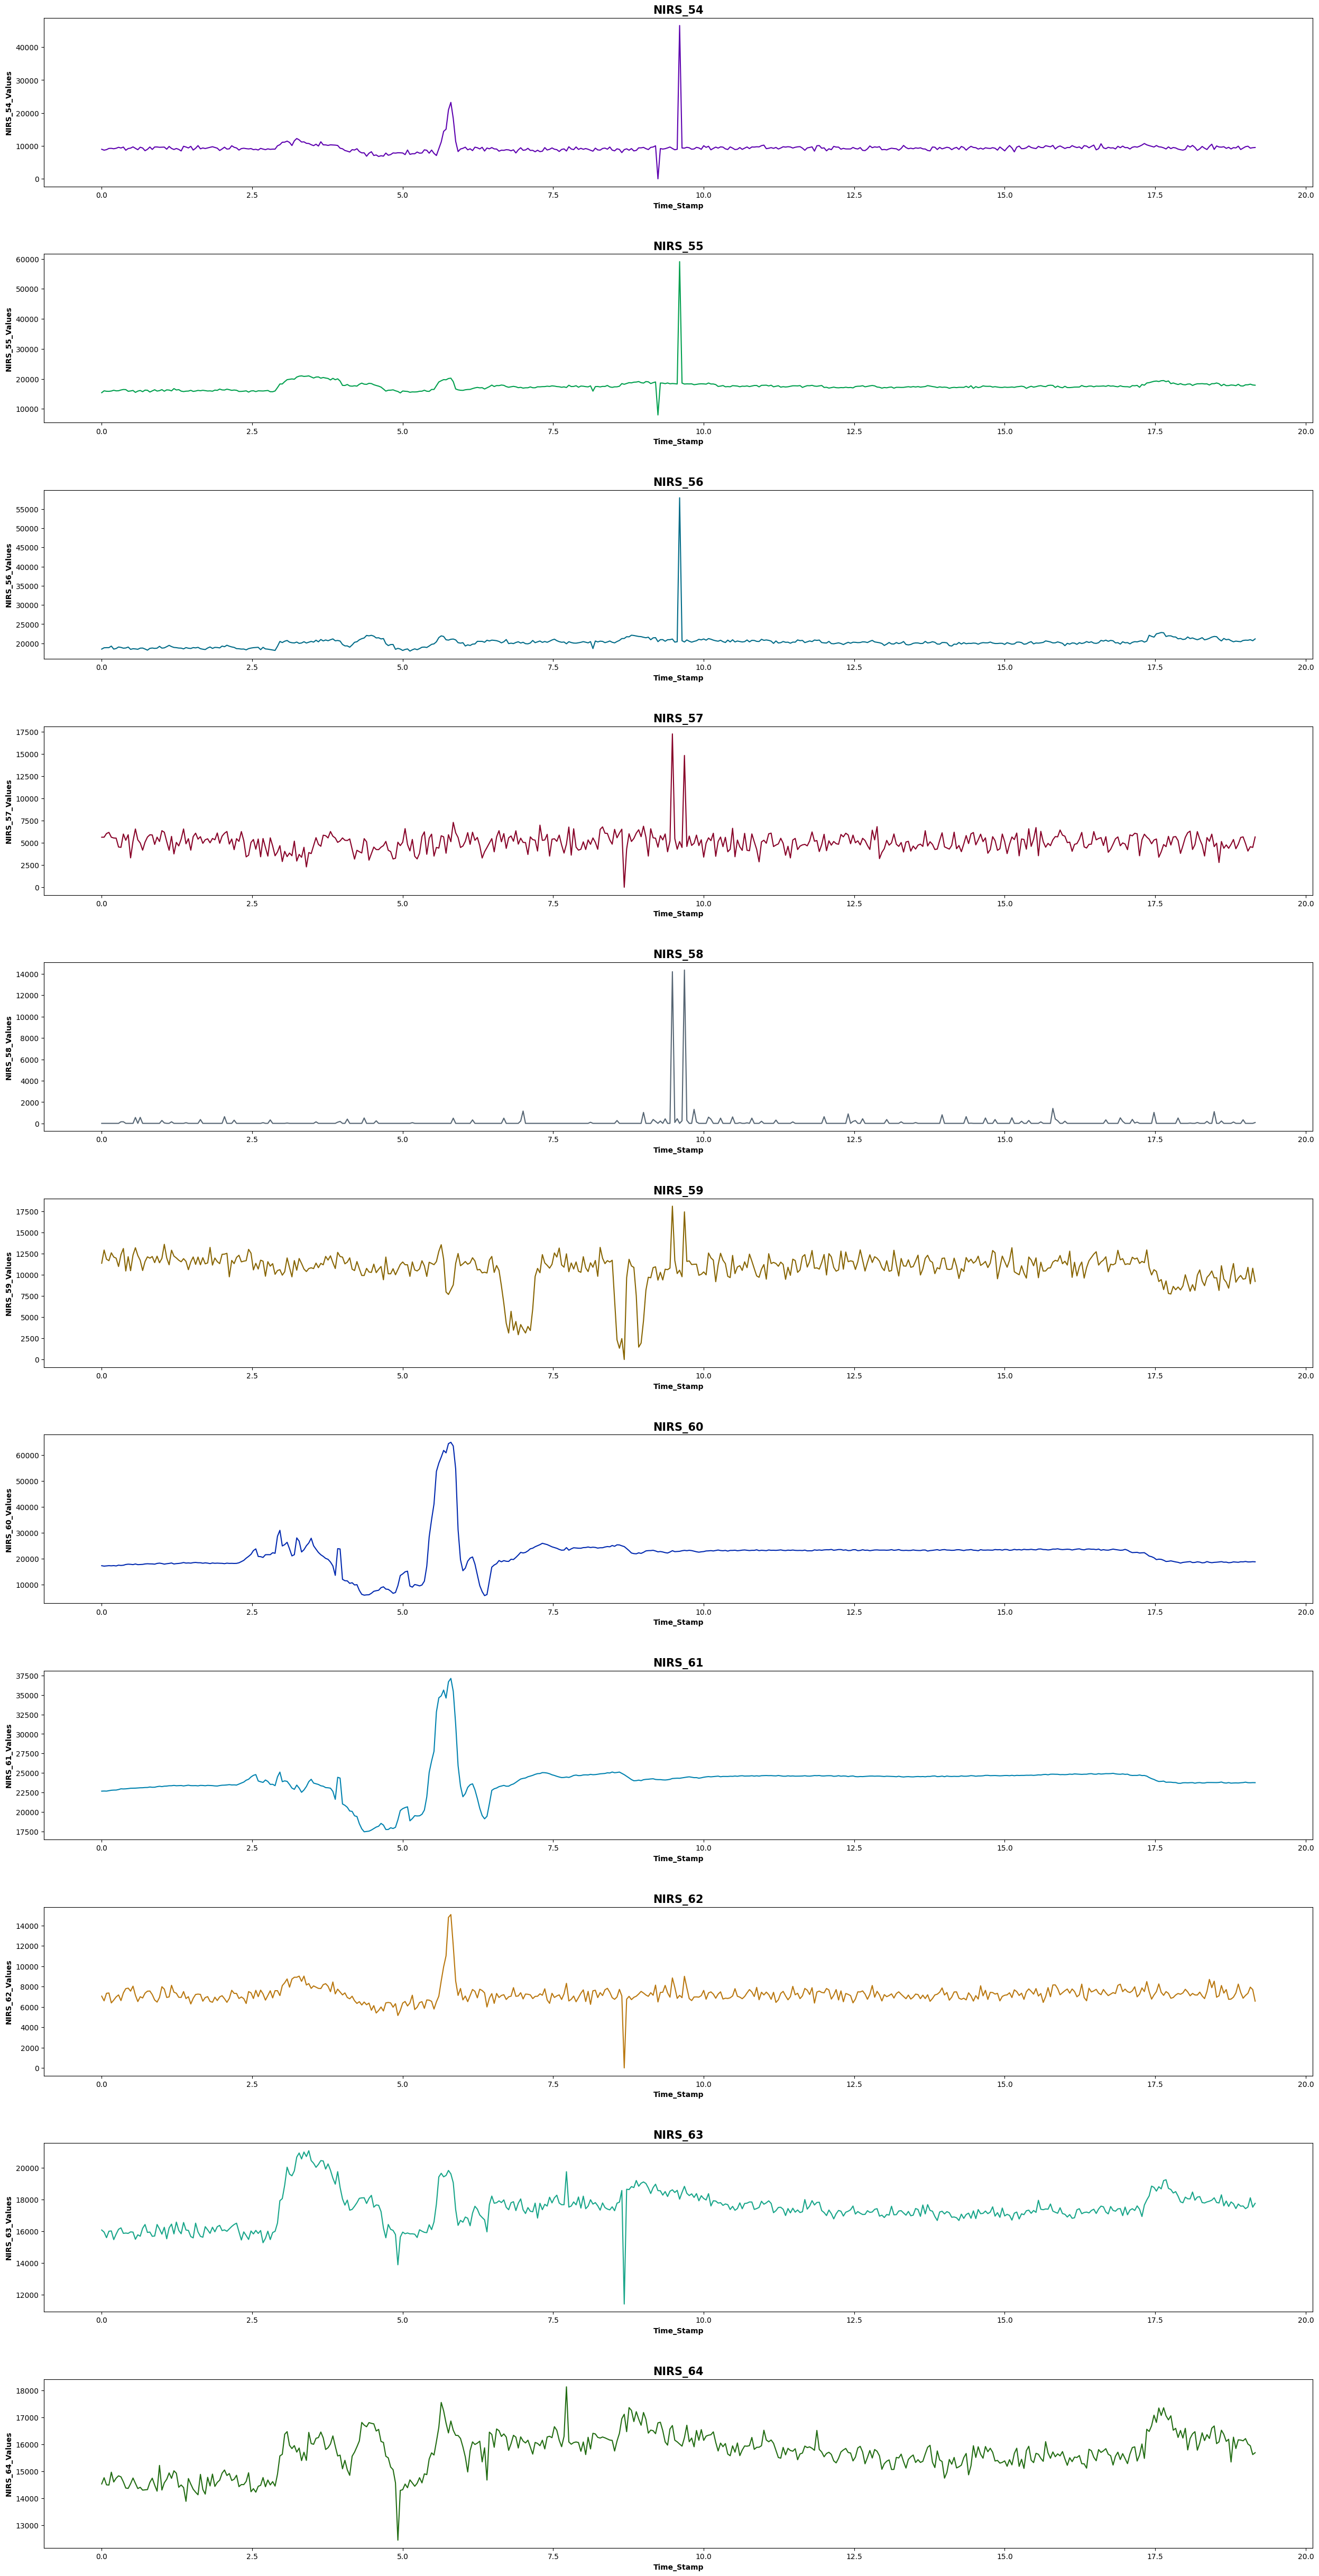

In [38]:
feat = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    feat.append(new_keys[i].description)





######################### Set the sample second #############################

sample_sec=120






basic_plot(dataset_dict[k_data.value][0],feat,sample_sec,dataset_dict[k_data.value][1])

In [31]:
len(feat)

11